In [1]:
import gymnasium as gym
import numpy as np
import random
from Qtabularfunctions import*
from Cartpolefamily import*
from metaQlearning import*
from plotfunctions import*
import matplotlib.pyplot as plt
import random

In [2]:
# state space limits
low = np.array([-4.8, -3.0, -0.418, -3.5])
high = np.array([4.8, 3.0, 0.418, 3.5])

min_td_error = 1e-3  # Minimum TD error threshold to continue episode
consecutive_small_errors = 5  # Number of consecutive small TD errors to trigger stop

num_actions = 501
lr=0.1
gamma=0.99
epsilon=1
force_mag=100

In [3]:
gen = CartPoleCategoryGenerator()

#initial:
agent = TabularQLearningAgent(
    statespace=[low,high],
    num_actions=num_actions,  
    lr=lr,
    gamma=gamma,
    epsilon=epsilon,
    force_mag=force_mag
)

actionspace_dict = {state_tuple: [*range(num_actions)] for state_tuple in agent.disc.get_all_discrete_states()}
actionset_dict = {state_tuple: [] for state_tuple in agent.disc.get_all_discrete_states()}

In [4]:
runner = MetaQLearningRunner(
    gen=gen,  # your environment generator
    low=low,
    high=high, 
    num_actions=num_actions,
    actionset_dict=actionset_dict,
    actionspace_dict=actionspace_dict,
    lr=lr,
    gamma=gamma,
    epsilon=epsilon,
    force_mag=force_mag
)

ANALYZING TRADE-OFF: num_runs vs Performance

Testing with num_runs = 3

Starting 3 experiments with:
  Episodes per run: 1000
  Using actionset as action space: False
  Updating actionset_dict: True

--- Starting Run 1/3 ---
Starting experiment with category: easy
Using actionspace_dict as action space (training (updating actionset_dict))


Experiment completed in 1.58 seconds
Mean reward: 15.87 ± 6.78
Early stops: 0/1000
Mode: training
Actionset dictionary was updated
Run 1 completed in 1.58s

--- Starting Run 2/3 ---
Starting experiment with category: medium
Using actionspace_dict as action space (training (updating actionset_dict))
Experiment completed in 2.02 seconds
Mean reward: 22.51 ± 9.97
Early stops: 0/1000
Mode: training
Actionset dictionary was updated
Run 2 completed in 2.02s

--- Starting Run 3/3 ---
Starting experiment with category: easy
Using actionspace_dict as action space (training (updating actionset_dict))
Experiment completed in 1.82 seconds
Mean reward: 20.21 ± 9.55
Early stops: 0/1000
Mode: training
Actionset dictionary was updated
Run 3 completed in 1.82s

--- Multiple Runs Summary ---
Total runtime: 5.43s
Average runtime per run: 1.81 ± 0.18s
Average reward: 19.53 ± 2.75

POLICY PERFORMANCE COMPARISON

--- Comparison Run 1/30 ---
Using category: easy
Training with actionspace_dict...
Evaluating a

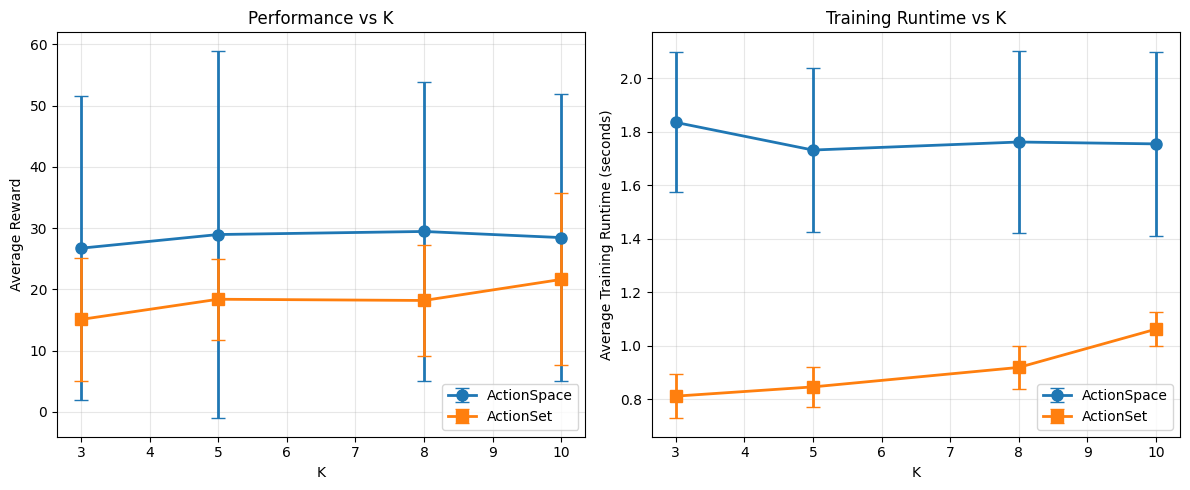

✓ Plot saved to: results/num_runs_tradeoff_20251119_134116_plot.png

DETAILED RESULTS SUMMARY
num_runs= 3: ActionSpace= 26.73, ActionSet= 15.10, Improvement=-11.63
num_runs= 5: ActionSpace= 28.97, ActionSet= 18.40, Improvement=-10.57
num_runs= 8: ActionSpace= 29.47, ActionSet= 18.20, Improvement=-11.27
num_runs=10: ActionSpace= 28.47, ActionSet= 21.63, Improvement=-6.83


<Figure size 640x480 with 0 Axes>

In [5]:
# Normal usage with auto-save
results = analyze_num_runs_tradeoff(runner, [3, 5, 8, 10])

In [7]:
# Load previous results
loaded_data = load_tradeoff_data("results/num_runs_tradeoff_20251119_134116_data.pkl")

# Resume analysis with additional runs
additional_results = resume_analysis(
    runner, 
    "results/num_runs_tradeoff_20251119_134116_data.pkl",
    additional_runs=[12, 15, 20]
)

🔄 Resuming analysis from previous save...
Processing additional runs: [12, 15, 20]

Testing with num_runs = 12

Starting 12 experiments with:
  Episodes per run: 1000
  Using actionset as action space: False
  Updating actionset_dict: True

--- Starting Run 1/12 ---
Starting experiment with category: medium
Using actionspace_dict as action space (training (updating actionset_dict))


Experiment completed in 1.94 seconds
Mean reward: 20.36 ± 8.23
Early stops: 0/1000
Mode: training
Actionset dictionary was updated
Run 1 completed in 1.94s

--- Starting Run 2/12 ---
Starting experiment with category: medium
Using actionspace_dict as action space (training (updating actionset_dict))
Experiment completed in 1.92 seconds
Mean reward: 18.56 ± 7.17
Early stops: 0/1000
Mode: training
Actionset dictionary was updated
Run 2 completed in 1.92s

--- Starting Run 3/12 ---
Starting experiment with category: easy
Using actionspace_dict as action space (training (updating actionset_dict))
Experiment completed in 1.46 seconds
Mean reward: 17.31 ± 8.36
Early stops: 0/1000
Mode: training
Actionset dictionary was updated
Run 3 completed in 1.46s

--- Starting Run 4/12 ---
Starting experiment with category: medium
Using actionspace_dict as action space (training (updating actionset_dict))
Experiment completed in 1.56 seconds
Mean reward: 18.95 ± 7.16
Early stops: 0/1000
Mode: training
A


=== Final Plots ===


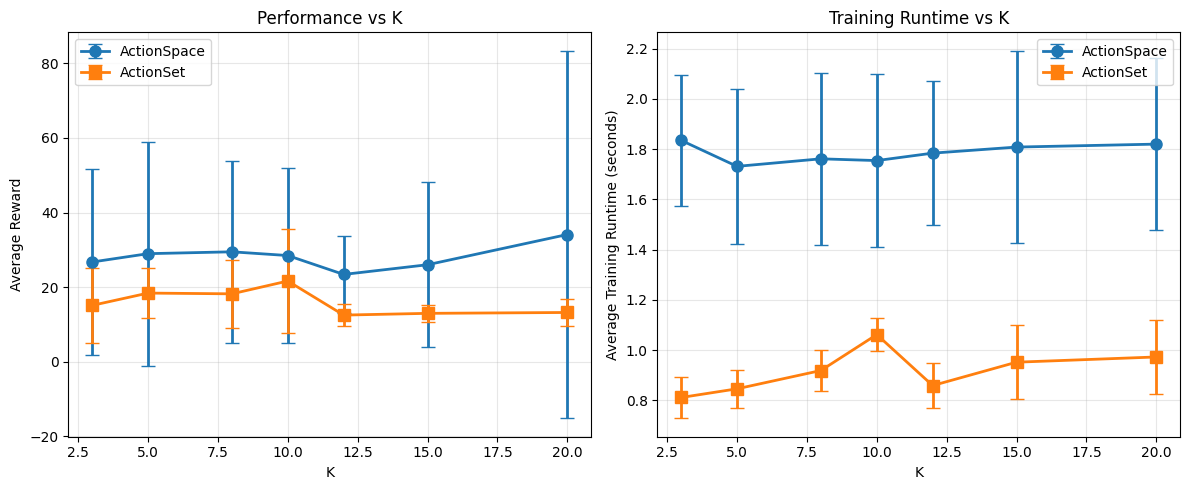

<Figure size 640x480 with 0 Axes>

In [10]:
# Step 5: Final plot update
print("\n=== Final Plots ===")
plot_num_runs_vs_performance(additional_results)

# Save the plot
plot_file = 'results/num_runs_tradeoff_20251119_134116_plot.png'
plt.savefig(plot_file, dpi=300, bbox_inches='tight')